In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

datasets= pd.read_csv(r'C:\D\Amitt\session\Social_Network_Ads.csv')
print(datasets.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [6]:
x=datasets.iloc[:,[2,3]].values
y=datasets.iloc[:,4].values

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)


In [9]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)

In [12]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

y_pred=classifier.predict(x_test)


In [16]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score
cm=confusion_matrix(y_test,y_pred)
cm

array([[74,  5],
       [11, 30]])

In [17]:
accuracy_score=accuracy_score(y_test,y_pred)
recall_score=recall_score(y_test,y_pred)
precision_score=precision_score(y_test,y_pred)
f1_score=f1_score(y_test,y_pred)
accuracy_score

0.8666666666666667

In [18]:
recall_score

np.float64(0.7317073170731707)

In [19]:
precision_score

np.float64(0.8571428571428571)

In [20]:
f1_score

np.float64(0.7894736842105263)

C:\Users\pc\AppData\Local\Temp\ipykernel_1908\2398816814.py:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j,1],


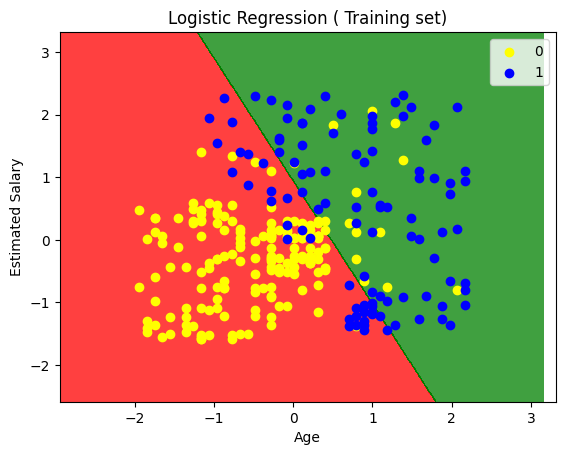

In [ ]:
# Visualising the Training set results 

from matplotlib.colors import ListedColormap
X_Set, Y_Set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_Set[:,0].min() -1, stop = X_Set[:, 0].max() +1, step = 0.01),
                    np.arange(start = X_Set[:,1].min() -1, stop = X_Set[:, 1].max() +1, step = 0.01))


plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X2.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j,1],
                c = ListedColormap(('yellow', 'blue'))(i), label = j)
plt.title('Logistic Regression ( Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()